In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
dfx=pd.read_csv('Diabetes_XTrain.csv')
dfy=pd.read_csv('Diabetes_YTrain.csv')


In [3]:
X=dfx.values
Y=dfy.values

In [4]:
print(X.shape)
print(Y.shape)

(576, 8)
(576, 1)


In [5]:
label=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


#Plotting a bar graph
def plot_bar_x():
    index = np.arange(len(label))
    plt.bar(index, )
    plt.xlabel('Genre', fontsize=5)
    plt.ylabel('No of Movies', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Market Share for Each Genre 1995-2017')
    plt.show()

In [6]:
print(dfy['Outcome'].unique())

print(dfy.groupby('Outcome').size())

[1 0]
Outcome
0    375
1    201
dtype: int64


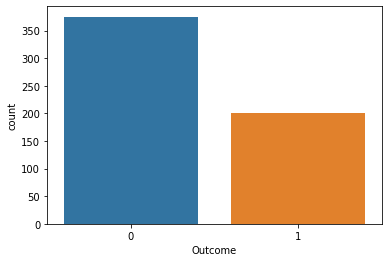

In [7]:
import seaborn as sns
sns.countplot(dfy['Outcome'],label="Count")
plt.show()

In [8]:
X_Test=pd.read_csv('Diabetes_Xtest.csv')
query_point=X_Test.values
print(query_point[0])

[  0.    180.     90.     26.     90.     36.5     0.314  35.   ]


In [9]:
def dist(x1,x2):
    #to calculate the eucladian distance
    return np.sqrt(sum((x1-x2)**2))

def KNN(X,Y,query_Point, k=11):
    vals=[]
    m=X.shape[0]
    
    for i in range(m):
        d=dist(query_Point,X[i])
        vals.append((d,Y[i]))
        
    vals=sorted(vals)
    #nearest/first k values of dist
    vals=vals[:k] #slicing
    vals=np.array(vals) #converting to np array
    new_vals=np.unique(vals[:,1],return_counts=True) #applying unique element count on the second col which stores the 1/0
    #print(new_vals) #returns a tuple of tuple with first tuple having the parameters and second their freq
    
    max_freq_index=new_vals[1].argmax()
    pred=new_vals[0][max_freq_index]
    #print(vals)
    return pred

In [10]:
#x=KNN(X,Y,query_point[0])

In [11]:
#print(x)

In [13]:
m=query_point.shape[0]
print(m)

192


In [19]:
predictions=[]

for i in range(m):
    predictions.append(str(int(KNN(X,Y,query_point[i]))))
    
    
print(type(predictions))
print(type(predictions[0]))

<class 'list'>
<class 'str'>


In [16]:
with open('sample_submission.csv', 'w', newline='') as writeFile:
        writer = csv.writer(writeFile)
        writer.writerows(predictions)

In [17]:
solution=pd.read_csv('sample_submission.csv')
print(solution.shape)

(191, 1)
